In [2]:
# upload training and testing data
from google.colab import files
uploaded = files.upload()

Upload widget is only available when the cell has been executed in the
 current browser session. Please rerun this cell to enable.

Saving creditcard_train.csv to creditcard_train.csv


In [0]:
import numpy as np 
from math import log
import pandas as pd 
from subprocess import check_output
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

395
227394


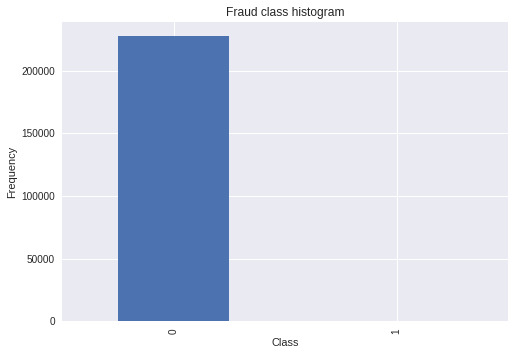

In [4]:
credit_data=pd.read_csv('creditcard_train.csv')
count_classes = pd.value_counts(credit_data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
print(len(credit_data[credit_data['Class'] == 1]))
print(len(credit_data[credit_data['Class'] == 0]))

Text(0.5,1,'Distribution of Transaction Amount')

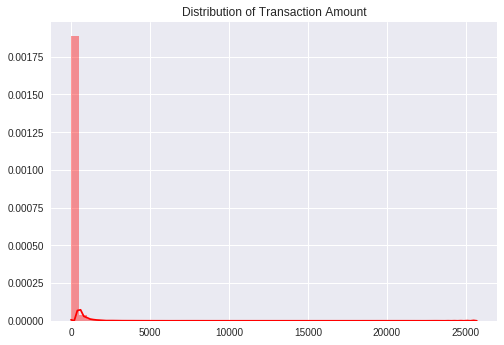

In [5]:
amount_val = credit_data['Amount'].values
ax = sns.distplot(amount_val, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=12)

Text(0.5,1,'Distribution of Log of Transaction Amount')

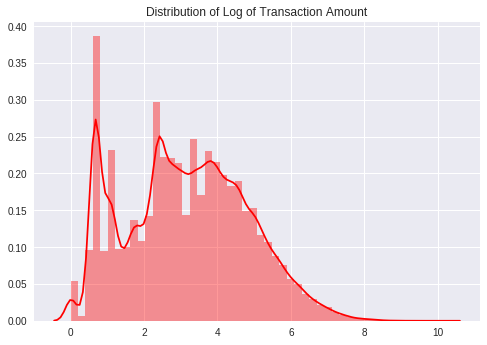

In [6]:
credit_data['Log_Amount']=np.log(credit_data['Amount']+1)
log_amount_val = credit_data['Log_Amount'].values
ax = sns.distplot(log_amount_val, color='r')
ax.set_title('Distribution of Log of Transaction Amount', fontsize=12)

## **Naive Bayes**

In [7]:
credit_data=pd.read_csv('creditcard_train.csv')
credit_data['Log_Amount']=np.log(credit_data['Amount']+1)
credit_data.drop(['Id', 'Amount'], axis=1, inplace=True)


col=list(credit_data.columns.values)


def NB_Classify(drop_var):
  clf = BernoulliNB()
  scores = cross_val_score(clf, credit_data.drop(drop_var, axis=1), credit_data['Class'], cv=4, scoring='f1')
  print(np.mean(scores))
  return np.mean(scores)


features_importance = dict()
for var in col:
    acc = NB_Classify(['Class', var])
    features_importance[var] = acc

0.7123819481828095
0.7095779771821592
0.700511559058437
0.648440250636763
0.6708448563273766
0.7229865955878827
0.7011650986297969
0.681594099556091
0.7042451537241814
0.6986052927723527
0.6888729530048705
0.6739549480480873
0.6484668917743184
0.7139739879838045
0.6634817585691606
0.7163943074469391
0.6804085187812912
0.6920322187535204
0.7167202113942213
0.7111251345115687
0.7021033868092692
0.7112151739178175
0.7118374148794895
0.7042798502568469
0.7061668351609677
0.7126770861044949
0.7061716881874702
0.709317311041449
0.7064819094208328
0.7123819481828095
0.7190183389920002


In [8]:
sorted(features_importance.items(), key=lambda x: x[1])

[('V3', 0.648440250636763),
 ('V12', 0.6484668917743184),
 ('V14', 0.6634817585691606),
 ('V4', 0.6708448563273766),
 ('V11', 0.6739549480480873),
 ('V16', 0.6804085187812912),
 ('V7', 0.681594099556091),
 ('V10', 0.6888729530048705),
 ('V17', 0.6920322187535204),
 ('V9', 0.6986052927723527),
 ('V2', 0.700511559058437),
 ('V6', 0.7011650986297969),
 ('V20', 0.7021033868092692),
 ('V8', 0.7042451537241814),
 ('V23', 0.7042798502568469),
 ('V24', 0.7061668351609677),
 ('V26', 0.7061716881874702),
 ('V28', 0.7064819094208328),
 ('V27', 0.709317311041449),
 ('V1', 0.7095779771821592),
 ('V19', 0.7111251345115687),
 ('V21', 0.7112151739178175),
 ('V22', 0.7118374148794895),
 ('Time', 0.7123819481828095),
 ('Class', 0.7123819481828095),
 ('V25', 0.7126770861044949),
 ('V13', 0.7139739879838045),
 ('V15', 0.7163943074469391),
 ('V18', 0.7167202113942213),
 ('Log_Amount', 0.7190183389920002),
 ('V5', 0.7229865955878827)]

In [10]:
from google.colab import files
uploaded = files.upload()

Upload widget is only available when the cell has been executed in the
 current browser session. Please rerun this cell to enable.

Saving creditcard_test_class.csv to creditcard_test_class.csv


In [11]:
credit_data=pd.read_csv('creditcard_train.csv')
credit_data['Log_Amount']=np.log(credit_data['Amount']+1)
credit_data.drop(['Id', 'Amount'], axis=1, inplace=True)
clf = BernoulliNB()
clf.fit(credit_data.drop(['Class', 'V5', 'Time', 'Log_Amount'],axis=1),credit_data['Class'])


credit_testdata=pd.read_csv('creditcard_test_class.csv')
credit_testdata['Log_Amount']=np.log(credit_testdata['Amount']+1)
credit_testdata.drop(['Id', 'Amount'], axis=1, inplace=True)

pred = clf.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
print(precision_score(credit_testdata['Class'], pred))
print(recall_score(credit_testdata['Class'], pred))
print(f1_score(credit_testdata['Class'], pred))

0.7710843373493976
0.6597938144329897
0.7111111111111111


In [12]:
from sklearn.metrics import recall_score
# Under sampling
# or directly use http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.under_sampling.RandomUnderSampler.html
def undersample(credit_data, ratio):
  number_records_fraud = len(credit_data[credit_data.Class == 1])
  fraud_indices = np.array(credit_data[credit_data.Class == 1].index)


  normal_indices = credit_data[credit_data.Class == 0].index
  random_normal_indices = np.random.choice(normal_indices, number_records_fraud * ratio, replace = False)

  under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
  under_sample_data = credit_data.iloc[under_sample_indices,:]

  X_train_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
  y_train_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']
  
  return (X_train_undersample, y_train_undersample.values.ravel())


X_train_undersample, y_train_undersample = undersample(credit_data, 250)

nb_clf_resample = BernoulliNB()
nb_clf_resample.fit(X_train_undersample.drop(['V5', 'Time', 'Log_Amount'],axis=1), y_train_undersample)

pred = nb_clf_resample.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
print(precision_score(credit_testdata['Class'], pred))
print(recall_score(credit_testdata['Class'], pred))
print(f1_score(credit_testdata['Class'], pred))

0.7472527472527473
0.7010309278350515
0.723404255319149


## **Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

log_cfl = LogisticRegression()
X_train = credit_data.drop(['Class', 'V5', 'Time', 'Log_Amount'],axis=1)
y_train = credit_data['Class']
log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_train)
print(f1_score(y_train, y_pred))

pred = log_cfl.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
print(f1_score(credit_testdata['Class'], pred))

print('Now trying undersampling...')

log_cfl_undersample = LogisticRegression()
X_train_undersample, y_train_undersample = undersample(credit_data, 300)
log_cfl.fit(X_train_undersample.drop(['V5', 'Log_Amount', 'Time'],axis=1), y_train_undersample)
y_pred = log_cfl.predict(X_train)
print(f1_score(y_train, y_pred))

pred = log_cfl.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
print(f1_score(credit_testdata['Class'], pred))

0.7573099415204678
0.7100591715976331
Now trying undersampling...
0.8021828103683493
0.8043478260869564


In [0]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV


pprint(log_cfl.get_params())
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10]
            }
CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'f1', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train_undersample.drop(['V5', 'Log_Amount', 'Time'],axis=1), y_train_undersample)
best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)

In [0]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])
log_cfl.fit(X_train_undersample.drop(['V5', 'Log_Amount', 'Time'],axis=1), y_train_undersample)
y_pred = log_cfl.predict(X_train_undersample.drop(['V5', 'Log_Amount', 'Time'],axis=1))
print(f1_score(y_train_undersample, y_pred))

pred = log_cfl.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
print(f1_score(credit_testdata['Class'], pred))

## **Ensemble - Voting**

In [16]:
from sklearn.ensemble import VotingClassifier


# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

voting_cfl = VotingClassifier (estimators = [('nb', nb_clf_resample), ('lr', log_cfl)], voting='soft', weights = [1, 1.5])
voting_cfl.fit(X_train_undersample.drop(['V5', 'Log_Amount', 'Time'],axis=1),y_train_undersample)

y_pred = voting_cfl.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
y_score = voting_cfl.predict_proba(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))[:,1]

print(f1_score(credit_testdata['Class'], y_pred))

0.7914438502673796


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## **Random Forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier


rf_cfl = RandomForestClassifier(n_jobs = -1)
rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_train)
print(f1_score(y_train, y_pred))


pred = rf_cfl.predict(credit_testdata.drop(['Class', 'V5', 'Log_Amount', 'Time'],axis=1))
print(f1_score(credit_testdata['Class'], pred))

0.9754204398447606
0.8426966292134831
